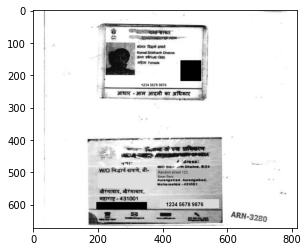

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

DATADIR = "C:\\Users\\inaze\\Desktop\\problem\\data"

CATEGORIES = ["aadhaar", "dl", "pan", "voter"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break  
    break  

In [1]:
IMG_SIZE=100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


NameError: name 'cv2' is not defined

In [22]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
 

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 266.61it/s]

18


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

3
1
2
1
3
0
0
2
2
1


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[145]
   [148]
   [131]
   ...
   [153]
   [151]
   [114]]

  [[148]
   [140]
   [137]
   ...
   [106]
   [110]
   [132]]

  [[154]
   [154]
   [130]
   ...
   [145]
   [142]
   [131]]

  ...

  [[130]
   [119]
   [131]
   ...
   [129]
   [145]
   [135]]

  [[103]
   [110]
   [127]
   ...
   [133]
   [131]
   [141]]

  [[113]
   [124]
   [131]
   ...
   [134]
   [127]
   [135]]]]


In [17]:
import pickle
pickle_out=open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in=open("X.pickle", "rb")
X=pickle.load(pickle_in)
print(X[1], "and", y[1])

[[[130]
  [130]
  [131]
  ...
  [ 82]
  [ 69]
  [ 65]]

 [[134]
  [132]
  [132]
  ...
  [ 71]
  [ 68]
  [ 64]]

 [[134]
  [132]
  [131]
  ...
  [ 67]
  [ 65]
  [ 64]]

 ...

 [[ 49]
  [ 51]
  [ 49]
  ...
  [101]
  [ 98]
  [ 97]]

 [[ 54]
  [ 52]
  [ 50]
  ...
  [ 98]
  [ 99]
  [ 92]]

 [[ 55]
  [ 55]
  [ 52]
  ...
  [117]
  [107]
  [109]]] and 1


In [19]:
X=pickle.load(open("X.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))
X=X/255.0

In [8]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [21]:
model.fit(X, y, epochs=4, batch_size=32)

Epoch 1/4
1/1 [==============================] - 1s 1s/step - loss: -4476207.0000 - accuracy: 0.2778
Epoch 2/4
1/1 [==============================] - 1s 1s/step - loss: -4666066.0000 - accuracy: 0.2778
Epoch 3/4
1/1 [==============================] - 1s 1s/step - loss: -4844710.0000 - accuracy: 0.2778
Epoch 4/4
1/1 [==============================] - 1s 1s/step - loss: -5012471.0000 - accuracy: 0.2778
